#Multiple Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

In [ ]:
df=pd.read_csv('/content/50_Startups.csv - 50_Startups.csv.csv')

In [ ]:
df.head() #tail(last 5 rows)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.keys()

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

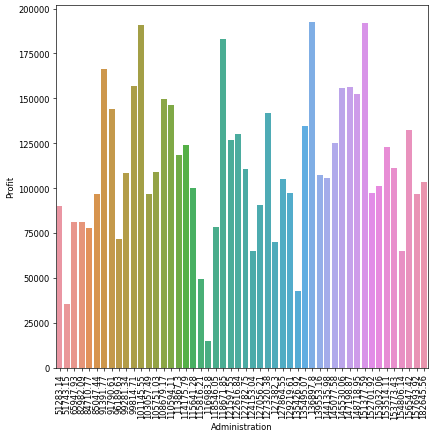

In [ ]:
plt.figure(figsize=(8,8),dpi=60)
sns.barplot('Administration','Profit',data=df)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


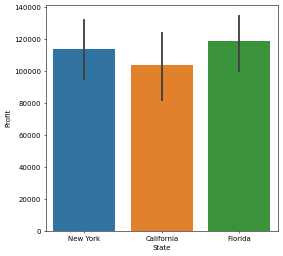

In [ ]:
plt.figure(figsize=(6,6),dpi=50)
sns.barplot('State','Profit',data=df)

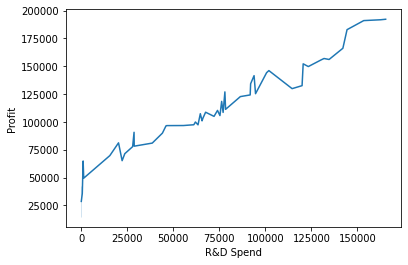

In [ ]:
sns.lineplot(x='R&D Spend',y='Profit',data=df)

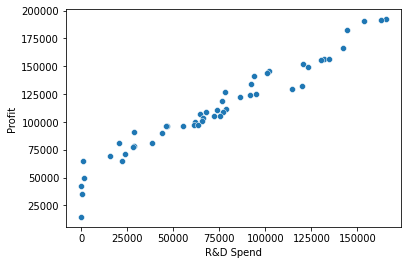

In [ ]:
sns.scatterplot(x='R&D Spend',y='Profit',data=df)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
df1=pd.get_dummies(df['State'])

In [ ]:
df1.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [ ]:
df.drop('State',inplace=True,axis=1)

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
df2=pd.concat([df1,df],axis=1)

In [ ]:
df2.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


In [ ]:
x=df2.iloc[:,:-1]  #independent variable
y=df2.iloc[:,-1]   #dependent variable

In [ ]:
x.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend
0,0,0,1,165349.20,136897.80,471784.10
1,1,0,0,162597.70,151377.59,443898.53
2,0,1,0,153441.51,101145.55,407934.54
3,0,0,1,144372.41,118671.85,383199.62
4,0,1,0,142107.34,91391.77,366168.42


In [ ]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)



(40, 6)
(40,)
(10, 6)
(10,)


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)


LinearRegression()

In [ ]:
lr.coef_

array([ 7.02161973e+02, -8.83046065e+01, -6.13857366e+02,  7.74546091e-01,
       -1.51527103e-02,  3.83636810e-02])

In [ ]:
lr.intercept_

47892.59079388867

In [ ]:
print('score on training data:',lr.score(xtrain,ytrain))
print('score on testing data:',lr.score(xtest,ytest))



score on training data: 0.943850522642993
score on testing data: 0.9669763022158536


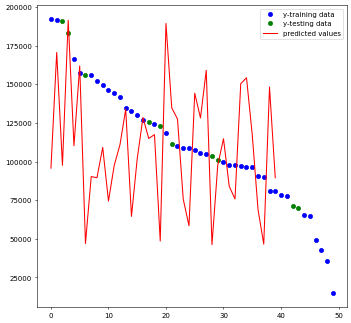

In [ ]:
plt.figure(figsize=(8,8),dpi=50)
plt.plot(ytrain,'o',color='blue',label='y-training data')
plt.plot(ytest,'o',color='green',label='y-testing data')
plt.plot(lr.predict(xtrain),color='red',label='predicted values')
plt.legend()

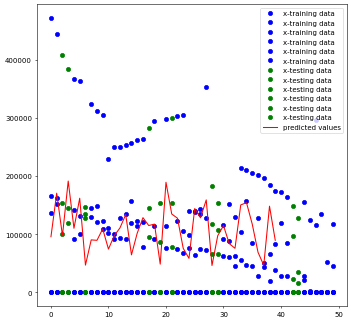

In [ ]:
plt.figure(figsize=(8,8),dpi=50)
plt.plot(xtrain,'o',color='blue',label='x-training data')
plt.plot(xtest,'o',color='green',label='x-testing data')
plt.plot(lr.predict(xtrain),color='red',label='predicted values')
plt.legend()

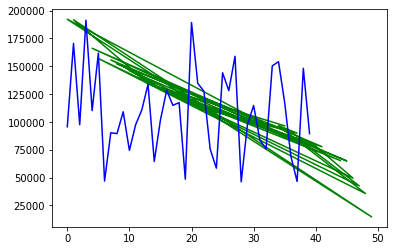

In [ ]:
#plt.plot(xtrain,'o',color='black')
plt.plot(ytrain,color='green')
plt.plot(lr.predict(xtrain),color='blue')

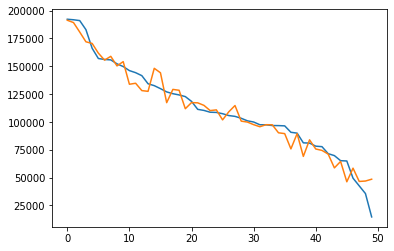

In [ ]:
plt.plot(y)
plt.plot(lr.predict(x))

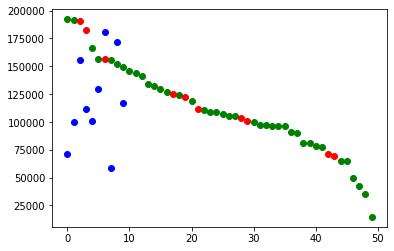

In [ ]:
plt.plot(ytrain,'o',color='green')
plt.plot(ytest,'o',color='red')
plt.plot(lr.predict(xtest),'o',color='blue')

In [ ]:
data=pd.DataFrame()
data['Actual values']=ytest
data['predicted values']=lr.predict(xtest)
data

,Actual values,predicted values
42,71498.49,71126.076460
29,101004.64,99884.573670
6,156122.51,155529.856602
19,122776.86,111888.619410
28,103282.38,100729.257404
17,125370.37,129237.338836
2,191050.39,180769.049296
43,69758.98,58721.670460
3,182901.99,172004.567055
21,111313.02,117163.932531


In [ ]:
df6=lr.predict(xtest)
df6

array([ 71126.07646015,  99884.57366953, 155529.85660165, 111888.61940958,
       100729.2574038 , 129237.33883574, 180769.04929609,  58721.67046003,
       172004.5670555 , 117163.93253105])